DATA LOADING AND SPLITTING

In [1]:
import sys
import os
import warnings

warnings.simplefilter("ignore")

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..', 'proposal')))

from data_distribution.data_loading import *

X,y=load_data()
X, label_encod=preprocess_data_label_encoding(X)
X_train, X_test, y_train, y_test = data_split(X, y,test_size=0.2, random_state=45)

LABEL DISTRIBUTION

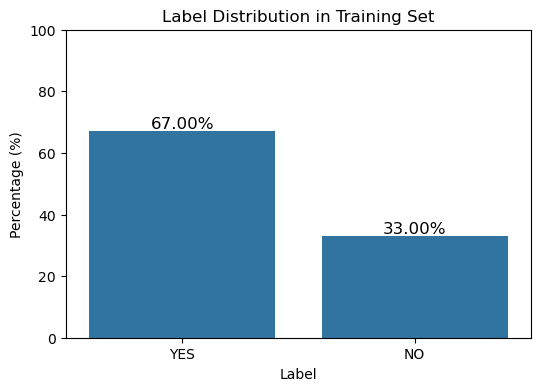

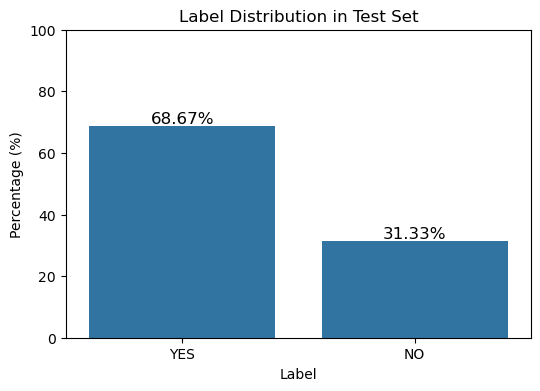

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the distribution of labels
def plot_label_distribution(y, title):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=y.value_counts(normalize=True).index, y=y.value_counts(normalize=True).values * 100)
    plt.xlabel("Label")
    plt.ylabel("Percentage (%)")
    plt.title(title)
    plt.ylim(0, 100)
    for i, v in enumerate(y.value_counts(normalize=True).values * 100):
        plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)
    plt.show()

# Visualization of label distribution in training and test sets
plot_label_distribution(y_train, "Label Distribution in Training Set")
plot_label_distribution(y_test, "Label Distribution in Test Set")

CORRELATION

In [3]:
# Calculates the correlation between each feature and a binary target variable.
def calculate_correlation_with_binary_target(X, y):

    from scipy.stats import pearsonr, chi2_contingency

    # Convert the binary target into numeric format (e.g., "yes" -> 1, "no" -> 0)
    target_classes = y.unique()
    if len(target_classes) != 2:
        raise ValueError("The target must have exactly 2 unique classes.")
    
    y_numeric = y.map({target_classes[0]: 0, target_classes[1]: 1})
    if y_numeric.isna().any():
        raise ValueError("Error mapping the binary target. Check unique target values.")

    correlations = []
    for col in X.columns:
        try:
            if np.issubdtype(X[col].dtype, np.number):
                corr, _ = pearsonr(X[col], y_numeric)
            else:
                contingency_table = pd.crosstab(X[col], y_numeric)
                chi2, _, _, _ = chi2_contingency(contingency_table)
                n = X.shape[0]
                corr = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            correlations.append((col, corr))
        except Exception as e:
            print(f"Error calculating correlation for column '{col}': {e}")
            correlations.append((col, np.nan))

    return pd.DataFrame(correlations, columns=['Feature', 'Correlation']).sort_values(by='Correlation', ascending=False)

correlations = calculate_correlation_with_binary_target(X, y)
print("\nCorrelation with the target:")
print(correlations)


Correlation with the target:
                  Feature  Correlation
5           PEER_PRESSURE     0.013286
6         CHRONIC DISEASE    -0.021930
0                  GENDER    -0.027221
12    SHORTNESS OF BREATH    -0.032815
2                 SMOKING    -0.035644
14             CHEST PAIN    -0.038085
4                 ANXIETY    -0.046589
13  SWALLOWING DIFFICULTY    -0.047883
9                WHEEZING    -0.051391
3          YELLOW_FINGERS    -0.079988
1                     AGE    -0.091648
11               COUGHING    -0.092904
7                 FATIGUE    -0.105202
10      ALCOHOL CONSUMING    -0.124622
8                 ALLERGY    -0.131125


FEATURE PLOT

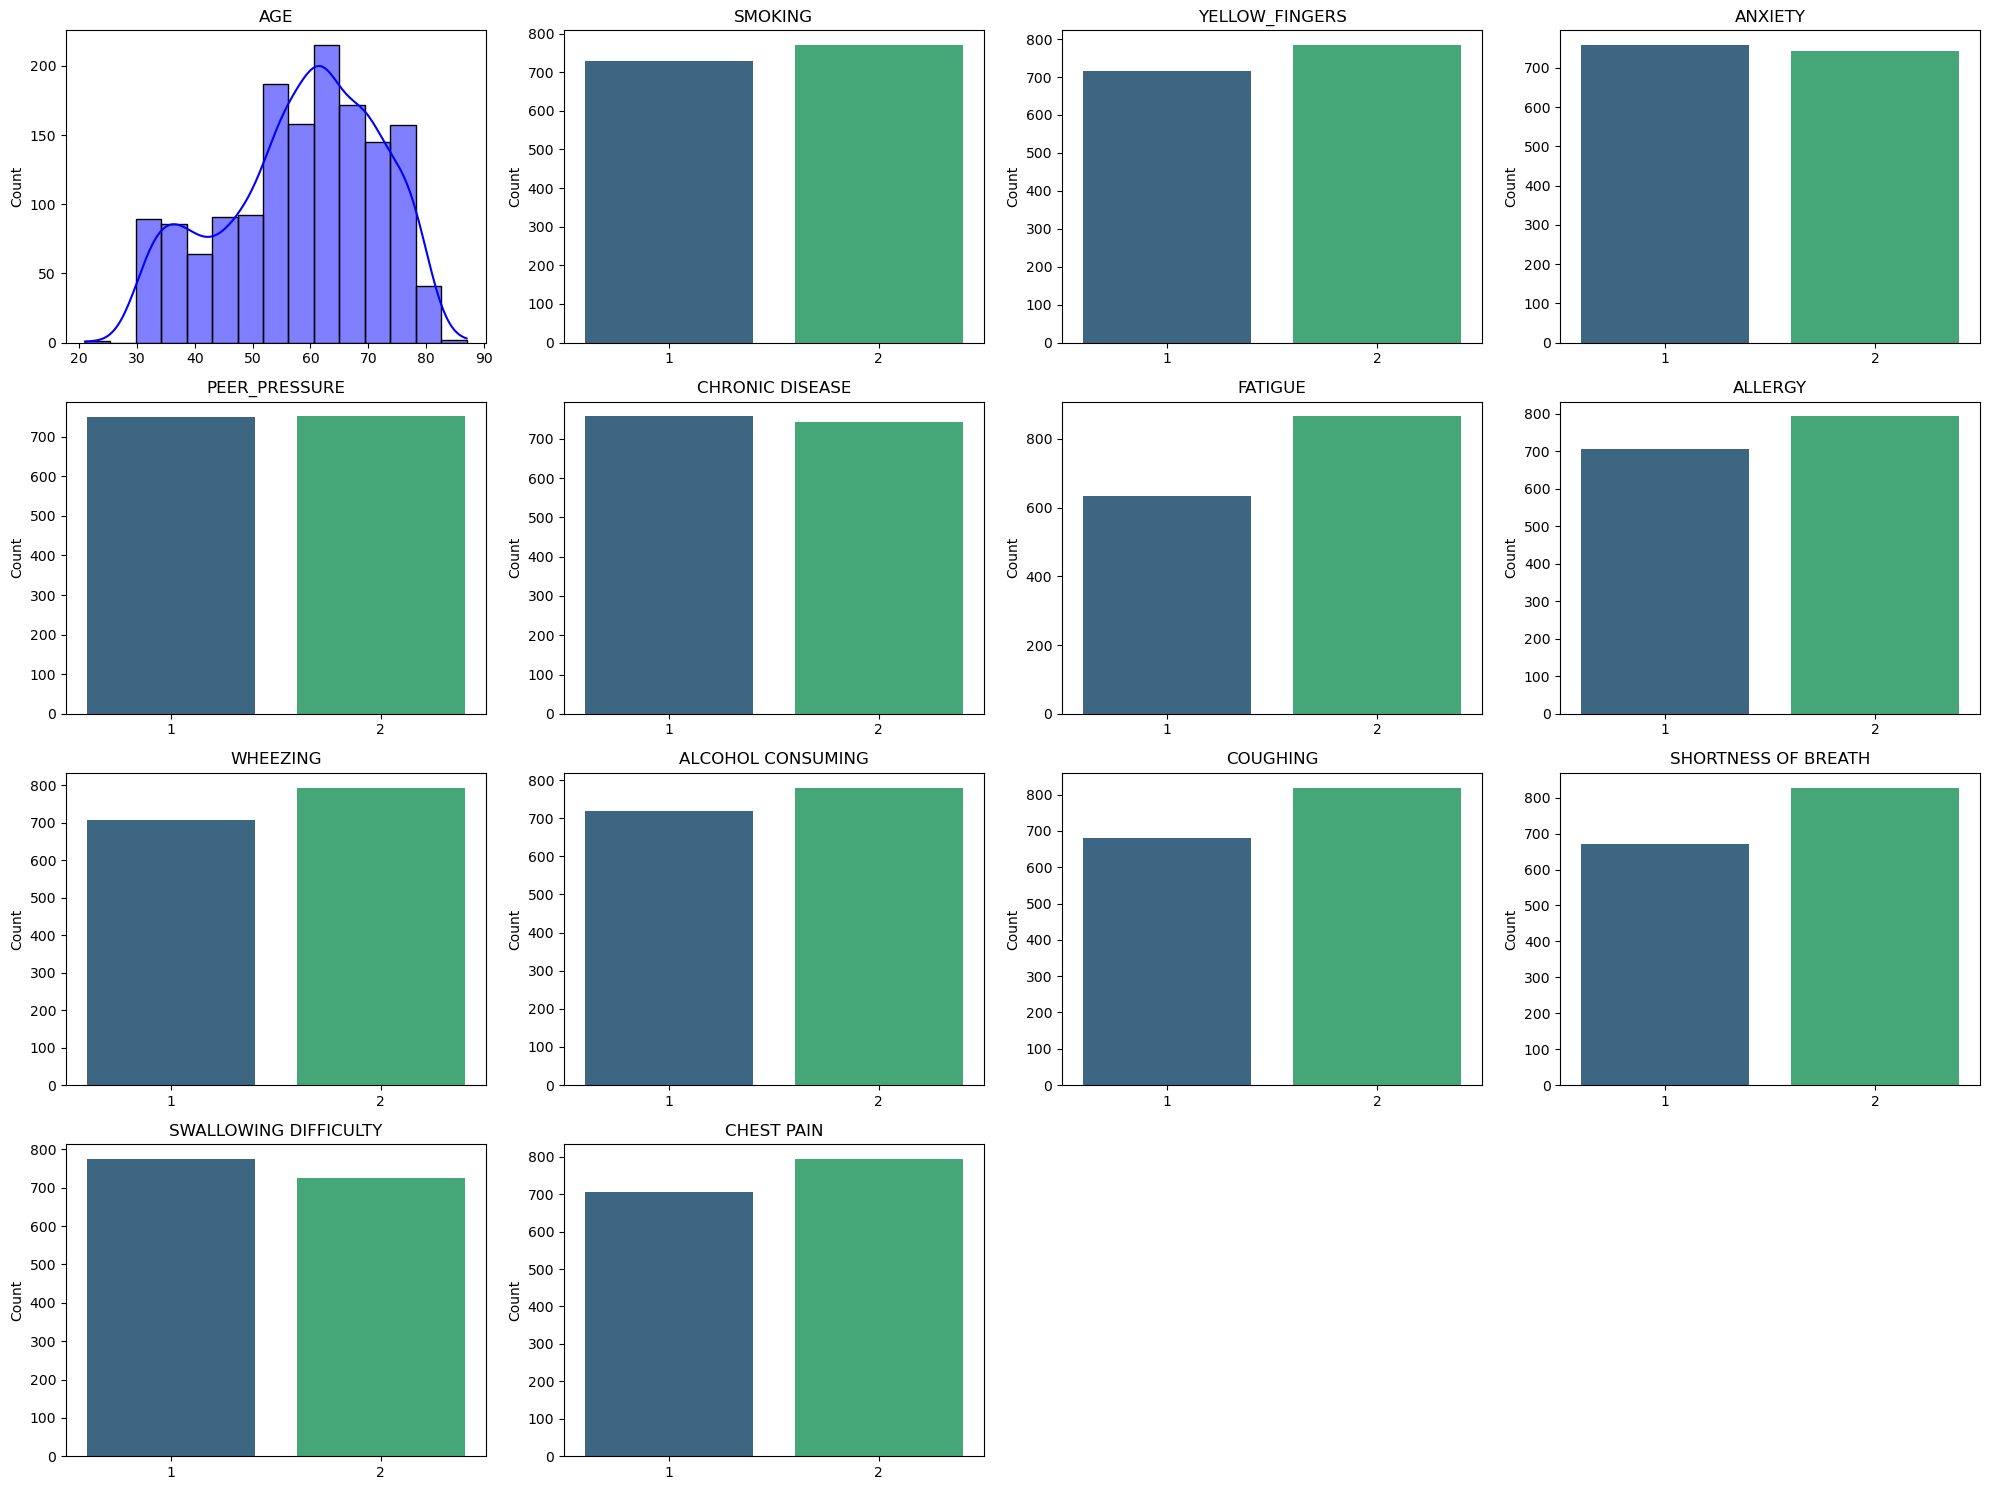

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot (excluding the target if necessary)
features = [
    "AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
    "CHRONIC DISEASE", "FATIGUE", "ALLERGY", "WHEEZING", 
    "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", 
    "SWALLOWING DIFFICULTY", "CHEST PAIN"
]

# Create a grid for the plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)  # 4 rows x 4 columns (modify if necessary)
    if X[feature].nunique() > 10:  # Continuous variable distribution (e.g., AGE)
        sns.histplot(X[feature], kde=True, bins=15, color="blue")
    else:  # Categorical variables
        sns.countplot(x=feature, data=X, palette="viridis")
    plt.title(feature, fontsize=12)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

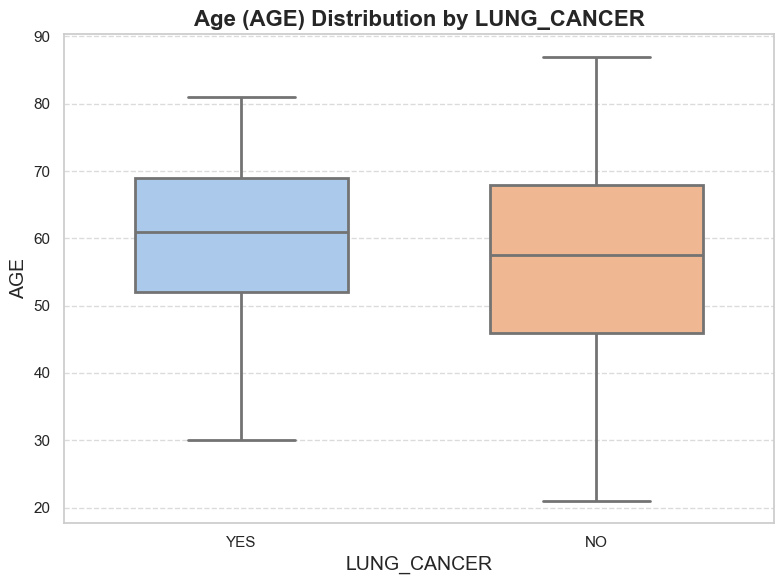

In [5]:
df_combined = X.copy()
df_combined['LUNG_CANCER'] = y

import seaborn as sns
import matplotlib.pyplot as plt

# Apply an aesthetic style
sns.set_theme(style="whitegrid")

# Create a boxplot with more visually appealing colors
plt.figure(figsize=(8, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_combined, palette="pastel", width=0.6, linewidth=2)

# Improve the title and labels
plt.title("Age (AGE) Distribution by LUNG_CANCER", fontsize=16, fontweight='bold')
plt.xlabel("LUNG_CANCER", fontsize=14)
plt.ylabel("AGE", fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

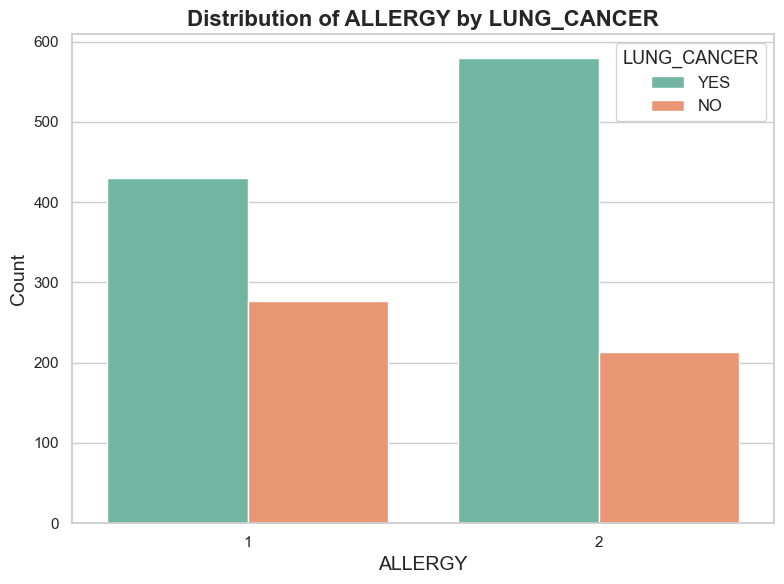

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ALLERGY', hue='LUNG_CANCER', data=df_combined, palette="Set2")

# Improve the title and labels
plt.title("Distribution of ALLERGY by LUNG_CANCER", fontsize=16, fontweight='bold')
plt.xlabel("ALLERGY", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="LUNG_CANCER", fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()